## Enter The Matrix

This notebook introduces two essential libraries for scientific computing and data visualization in Python:  
**Numpy and Matplotlib**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# np and plt are common aliases for numpy and matplotlib.pyplot respectively

### (Optional) if you're on mac and have homebrew installed, try this in your terminal:
`brew install cmatrix`

## Numpy Basics
Numpy is a powerful library for numerical computations in Python.  
It provides support for large, multi-dimensional arrays and matrices.  

In [ ]:
# Create a numpy array
basic_array = np.array([1, 2, 3, 4])
print(basic_array)
print(f"Type: {type(basic_array)}, Shape: {basic_array.shape}")
# This creates a 1-dimensional numpy array
# .shape attribute shows the dimensions of the array
# Numpy arrays are more efficient than Python lists for numerical operations

In [ ]:
# Specify the datatype
float_array = np.array([1, 2, 3, 4], dtype=np.float32)
print(float_array)
print(f"Datatype: {float_array.dtype}")
# np.float32 is a 32-bit floating point number
# Using specific datatypes can optimize memory usage and computation speed

In [ ]:
# Numpy arrays use the same datatype for all elements
mixed_array = np.array([1, 2.0, 'three', 4])
print(mixed_array)
print(f"Datatype: {mixed_array.dtype}")
# Note: This converts all elements to strings
# Numpy tries to find a common type that can represent all elements

### Numpy vs Python Lists

In [ ]:
# numpy arrays behave different to regular lists
python_list = [1,2,3]
numpy_array = np.array([1,2,3])

# Observe the difference: 
# - Lists concatenate
# - Numpy arrays perform element-wise addition
print(python_list + python_list)
print(numpy_array + numpy_array)

In [ ]:
# doesn't work for all data types
string_array = np.array(['a', 'b', 'g'])

print(string_array + string_array)

In [ ]:
# Numpy arrays support element-wise operations
# This multiplies each element by 10
print("Numpy array multiplication:", numpy_array * 10)


In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])

np.concatenate([a,b])
# We can concatenate numpy arrays using np.concatenate()
# This is similar to list concatenation, but works on numpy arrays

### Visualizing Arrays

In [ ]:
# dummy list of strings representing our image
str_list = [
     "00000000",
     "01111111",
     "00001111",
     "00001111",
     "00011111",
     "00001111",
     "00011000",
     "00000000"
     ]

In [ ]:
# build numpy array of 0s and 1s from previous list
# create a list of integers for each string in array
float_list = np.array([list(map(int, str)) for str in str_list], dtype=np.float32)

print(float_list)
print(float_list.shape)


In [ ]:
# plot image
plt.imshow(float_list, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

### Shuffling Arrays

In [ ]:
# shuffle the array randomly and plot it again
np.random.shuffle(float_list)

plt.imshow(float_list, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

# notice how it only shuffles the order of rows but not the rows themselves

In [ ]:
# in order to do shuffle the rows we need to create a random number generator
rng = np.random.default_rng()
# an easy example of how to use the random number generator
# generate a random number between 0 and 1
print(rng.random())
# generate a random number between 0 and 100
print(rng.integers(0, 100))

In [ ]:
# shuffle lists

permuted_image = rng.permutation(float_list, axis=0)  # Shuffles rows (height dimension)

plt.imshow(
permuted_image, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()


In [ ]:
permuted_image = rng.permutation(float_list, axis=1)  # Shuffles columns (width dimension)

plt.imshow(
permuted_image, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

In [ ]:
# Flatten and shuffle
flattened_image = float_list.reshape(-1, float_list.shape[2])  # Shape: (height*width, channels)
permuted_image = rng.permutation(flattened_image)                # Random permutation of all pixels
permuted_image = permuted_image.reshape(float_list.shape)       # Reshape back to original

### Random Arrays

In [ ]:
# now, in order to create a completely random array,
# we can use the random number generator

random_data = rng.random([8, 8])
plt.imshow(random_data, cmap='gray', interpolation='none')

plt.show()

In [ ]:
random_data = rng.random([8, 8])
# cmap is a colormap, interpolation is the interpolation method
# using this configuration, we can make the random array look a little bit like a lava lamp
plt.imshow(random_data, cmap='magma', interpolation='bicubic')

plt.show()

In [ ]:
random_data = rng.random([64,64])

plt.figure(figsize=(8,8))
plt.imshow(random_data, cmap='magma', interpolation='bicubic')

### Random Colors

In [ ]:
# an RGB color is simply a list of three numbers, each representing a color channel
# so we can generate a random color by sampling from a random number generator
color = random_color = rng.integers(0, 256, size=3)

print(color)

# Create a 24x24 array filled with the random color
img = np.full((24, 24, 3), color, dtype=np.uint8)

# Display the image using imshow()
plt.imshow(img)
plt.show()


In [ ]:
# Create a 24x24 array filled with random values
img = rng.integers(0, 256, size=(24, 24, 3), dtype=np.uint8)

# Display the image using imshow()
plt.imshow(img)
plt.show()

In [ ]:
# another approach:
img = (rng.standard_normal([64, 64, 3]) * 255).astype(np.uint8)
# this creates an array of random numbers from a standard normal distribution
# which is a normal distribution with a mean of 0 and a standard deviation of 1
# we then multiply the result by 255 to get a range of numbers from 0 to 255

plt.imshow(img)
plt.show()

In [ ]:
# Define a specific color palette
palette = [
    [230, 25, 75],    # Red
    [60, 180, 75],    # Green
    [255, 225, 25],   # Yellow
    [0, 130, 200],    # Blue
    [245, 130, 48],   # Orange
]

# Convert to a NumPy array
palette = np.array(palette, dtype=np.uint8)

# Create a 24x24 array filled with random colors from the palette
indices = rng.integers(0, len(palette), size=(24, 24))
img = palette[indices]

# Display the image
plt.imshow(img)
plt.show()

### Recreating Gerhard Richter's "4096 Farben"

In [ ]:
from IPython.display import Image
Image(url='https://cdn.gerhard-richter.com/images/original/2987.jpg?width=673&height=673')

In [ ]:
# Define the number of intensity levels per color channel
levels_per_channel = 16

# Generate evenly spaced intensity levels between 0 and 255
levels = np.linspace(0, 255, levels_per_channel, dtype=np.uint8)
# levels now contains 16 values: [0, 17, 34, ..., 255]

# Create a grid of all possible combinations of R, G, B levels
red, green, blue = np.meshgrid(levels, levels, levels)
# red, green, blue are arrays of shape (16, 16, 16)

# Flatten the grids and stack them to create a palette of colors
palette = np.stack([red.ravel(), green.ravel(), blue.ravel()], axis=1)
# palette is an array of shape (4096, 3), each row is [R, G, B]

# Optional: Shuffle the palette to randomize the color arrangement
rng = np.random.default_rng(seed=42)
rng.shuffle(palette)

# Reshape the palette into a 64x64 grid
img = palette.reshape((64, 64, 3))

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Recreation of Gerhard Richter's '4096 Farben'", fontsize=16)
plt.show()

#### Refined Approach

In [ ]:
rng = np.random.default_rng()
# Define a base palette inspired by Richter's style
base_palette = np.array([
    [255, 0, 0],      # Red
    [0, 255, 0],      # Green
    [0, 0, 255],      # Blue
    [255, 255, 0],    # Yellow
    [0, 255, 255],    # Cyan
    [255, 0, 255],    # Magenta
    [128, 128, 128],  # Grey
    [192, 192, 192],  # Light Grey
    [64, 64, 64],     # Dark Grey
], dtype=np.uint8)

def generate_color_variations(base_palette, num_colors=1024, variation_intensity=99):  
    # Randomly select a base color and add small variations to create unique colors
    generated_colors = []
    while len(generated_colors) < num_colors:
        # Pick a random base color
        base_color = base_palette[rng.integers(0, len(base_palette))]
        
        # Generate a random variation for the RGB channels
        variation = rng.integers(-variation_intensity, variation_intensity + 1, size=3)
        new_color = np.clip(base_color + variation, 0, 255)  # Ensure RGB values remain in [0, 255]
        
        # Convert to tuple to easily check uniqueness
        if tuple(new_color) not in generated_colors:
            generated_colors.append(tuple(new_color))
    
    return np.array(generated_colors, dtype=np.uint8)

# Generate 1,024 unique colors based on the base palette with slight variations
unique_colors = generate_color_variations(base_palette, num_colors=1024, variation_intensity=32)

# Repeat each of the 1,024 colors exactly 4 times
expanded_palette = np.repeat(unique_colors, 4, axis=0)  # Shape: (4096, 3)

# Shuffle the expanded palette to randomize the arrangement of repeated colors
rng = np.random.default_rng(seed=42)
rng.shuffle(expanded_palette)

# Reshape into a 64x64x3 array (64x64 grid with 3 color channels)
img = expanded_palette.reshape(64, 64, 3)

# Step 6: Display the image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Recreation of '4096 Farben' Using Base Palette and Variations", fontsize=16)
plt.show()

### Visualizing Images as Arrays

In [ ]:
# Download an image from Richter's website
!curl "https://cdn.gerhard-richter.com/images/original/9088.jpg?width=673&height=673" -o 'richter-vorhang.png'

In [ ]:
from PIL import Image

In [ ]:
# Load an image
image = Image.open('richter-vorhang.png')  # Replace with your image file
image = image.resize((128, 128))      # Resize for simplicity
image_array = np.array(image)

# Display the image
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display the matrix representation
print('Image shape:', image_array.shape)
print('Image matrix:\n', image_array)

In [ ]:
image_copy = np.copy(image_array)
perm_image = rng.permutation(image_copy, axis=1)
plt.imshow(perm_image)
plt.show()

In [ ]:
# Flatten the image array to a 1D array of pixels and shuffle
flattened_array = image_array.reshape(-1, image_array.shape[2])  # Shape (16384, 3) for RGB images
np.random.shuffle(flattened_array)  # Shuffle along the first axis

# Reshape the shuffled array back to the original image dimensions
shuffled_image_array = flattened_array.reshape(image_array.shape)

plt.imshow(shuffled_image_array)
plt.show()


### Visualizing Audio as Spectograms

#### Install Dependencies

In [ ]:
!pip install librosa

In [ ]:
!pip install librosa yt-dlp

#### Download and load a soundfile

In [ ]:
# download a YouTube video as mp3
!yt-dlp -f bestaudio --extract-audio --audio-format mp3 --audio-quality 0 "insert your yt link"

In [304]:
import librosa
import librosa.display
from IPython.display import Audio

In [299]:
# Load an audio file
audio_path = "/Users/c/Desktop/Code/bca/U-Roy - Natty Don't Fear [6JSKXxbOYOU].mp3"  # Replace with your audio file
y, sr = librosa.load(audio_path, offset=10, duration=5)  # Load 5 seconds, starting at second 10

#### Visualize the waveform

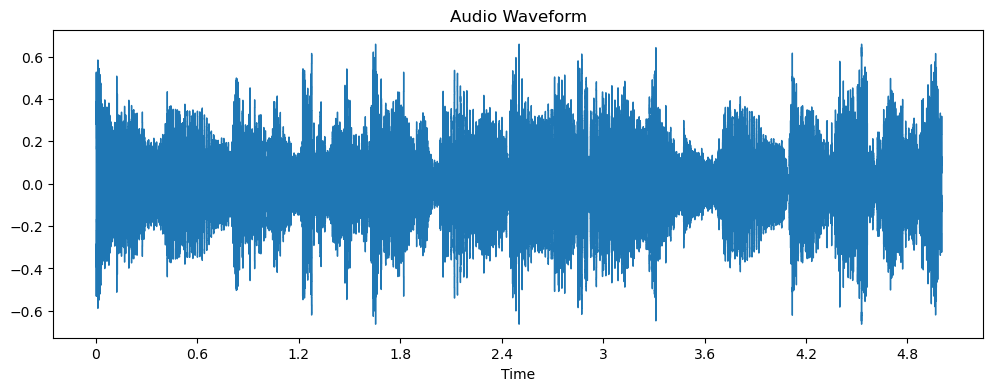

In [300]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.show()

#### Convert audio to a spectrogram (matrix representation)


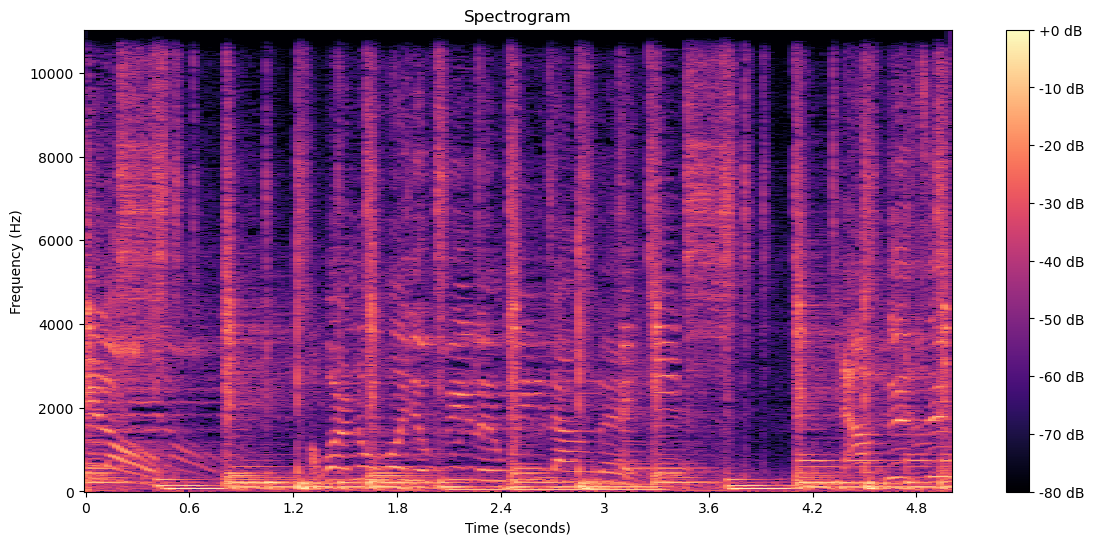

In [301]:
# Compute the Short-Time Fourier Transform (STFT) of the audio signal
D = librosa.stft(y)
# D is a complex matrix representing amplitude and phase for each time-frequency bin

# convert the amplitudes to decibels (dB) for better visualization.
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()


#### Frequency Filtering

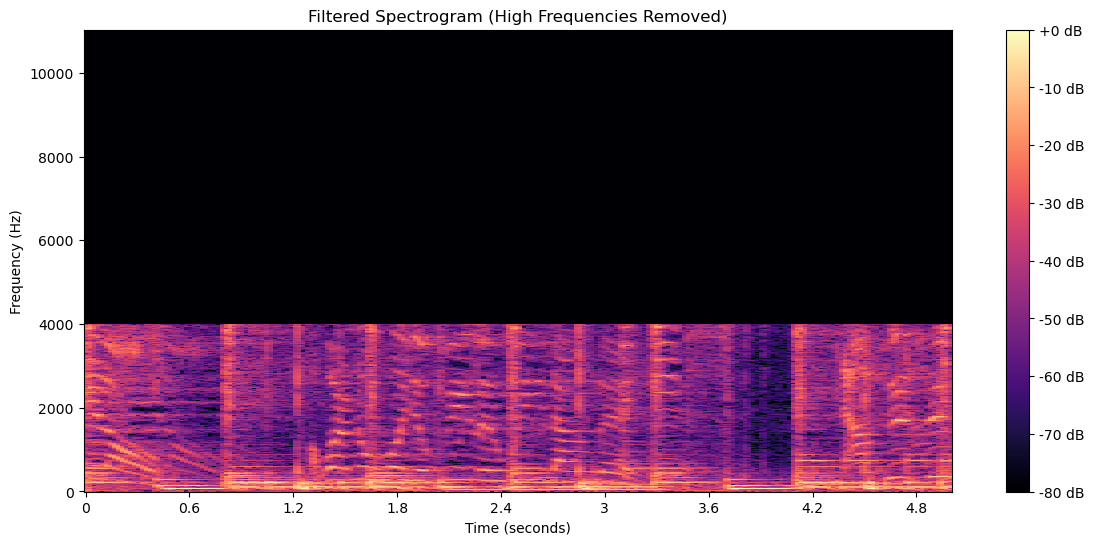

In [302]:
# Get the frequency bins
freqs = librosa.fft_frequencies(sr=sr)

# Define a frequency threshold (e.g., remove frequencies above 4000 Hz)
freq_threshold = 4000

# Create a mask for frequencies above the threshold
mask = freqs <= freq_threshold

# Apply the mask to the spectrogram
D_filtered = D.copy()
D_filtered[~mask, :] = 0  # Zero out the high frequencies

# Convert the filtered spectrogram back to amplitude in dB
S_db_filtered = librosa.amplitude_to_db(np.abs(D_filtered), ref=np.max)

# Display the filtered spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db_filtered, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Spectrogram (High Frequencies Removed)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [305]:
# Inverse STFT to get the time-domain signal
y_filtered = librosa.istft(D_filtered)
# performs the inverse Short-Time Fourier Transform, 
# converting the modified spectrogram back into a time-domain audio signal

# Play the filtered audio
print("Filtered Audio (High Frequencies Removed):")
Audio(data=y_filtered, rate=sr)

Filtered Audio (High Frequencies Removed):


#### Comparison

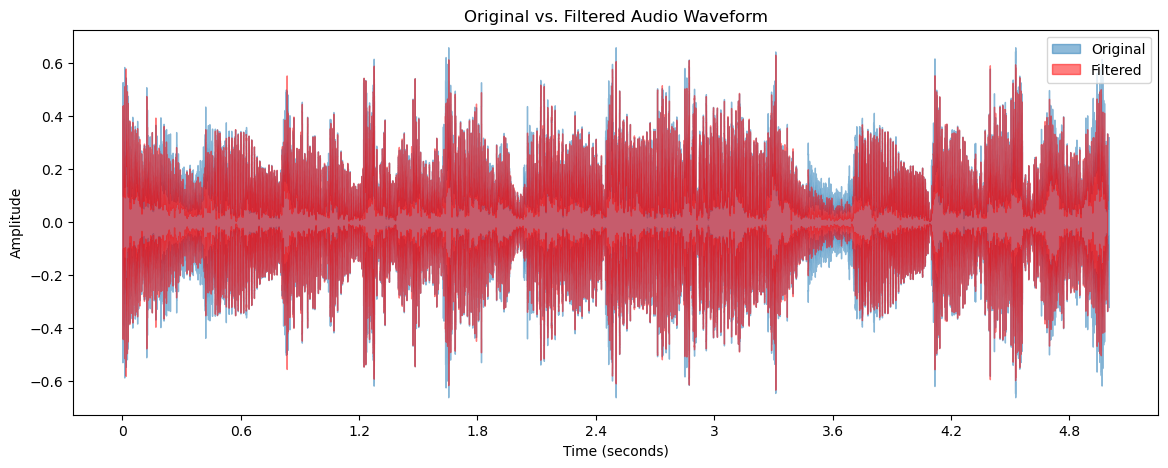

In [306]:
# Plot the original waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original')
librosa.display.waveshow(y_filtered, sr=sr, color='r', alpha=0.5, label='Filtered')
plt.title('Original vs. Filtered Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#### Using different librosa transformations

In [307]:
# Time-stretch the audio by a factor of 1.5 (slows down the audio)
y_stretched = librosa.effects.time_stretch(y, rate=0.75)

# Play the time-stretched audio
print("Time-Stretched Audio (Slowed Down):")
Audio(data=y_stretched, rate=sr)

Time-Stretched Audio (Slowed Down):


In [308]:
# Pitch shift the audio up by 4 semitones
y_pitched = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)

# Play the pitch-shifted audio
print("Pitch-Shifted Audio (4 Semitones Up):")
Audio(data=y_pitched, rate=sr)

Pitch-Shifted Audio (4 Semitones Up):
